<a href="https://colab.research.google.com/github/Nandika28/CatsAndDogs-Task/blob/master/Task1_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

Using TensorFlow backend.


Step 1:Downloading the dataset. 
Dataset Link: https://www.microsoft.com/en-us/download/details.aspx?id=54765
Classifying the images as cat and dog

In [2]:
!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
-O "/tmp/cats-and-dogs.zip"

import zipfile
zipped_data_path = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(zipped_data_path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-07-10 06:33:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.126, 2600:1417:8000:9ac::e59, 2600:1417:8000:9b2::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   169MB/s    in 4.6s    

2020-07-10 06:33:23 (172 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
data_dir = '/tmp/PetImages/'
CLASS_NAMES = os.listdir(data_dir)
print(CLASS_NAMES)

['Cat', 'Dog']


In [4]:

# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '/tmp/PetImages/Cat/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
  try:
	# determine class
	  output = 1.0
	# load image
	  photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	  photo = img_to_array(photo)
	# store
	  photos.append(photo)
	  labels.append(output)
  except(IOError, SyntaxError) as e:   
    print('Bad file:', file) # print out the names

# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('cats_photos.npy', photos)
save('cats_labels.npy', labels)

Bad file: Thumbs.db
Bad file: 666.jpg
(12499, 200, 200, 3) (12499,)


In [5]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '/tmp/PetImages/Dog/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
  try:
	# determine class
	  output = 0.0
	# load image
	  photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	  photo = img_to_array(photo)
	# store
	  photos.append(photo)
	  labels.append(output)
  except(IOError, SyntaxError) as e:   
    print('Bad file:', file) # print out the names

# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_photos.npy', photos)
save('dogs_labels.npy', labels)

Bad file: 11702.jpg


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Bad file: Thumbs.db
(12499, 200, 200, 3) (12499,)


In [6]:
# load and confirm the shape
from numpy import load
photos = load('dogs_photos.npy')
labels = load('dogs_labels.npy')
print(photos.shape, labels.shape)

(12499, 200, 200, 3) (12499,)


Step 2: Plan how you will prepare the data to feed to your data processor. The data is fed to the processor with the same structure . Directories are created for test and train and data is split accordingly into cats and dogs folder in the 2 directories

In [7]:
# create directories
dataset_home = 'random_dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [8]:
from sklearn.model_selection import train_test_split
cat_files=os.listdir("/tmp/PetImages/Cat/")

dog_files=os.listdir("/tmp/PetImages/Dog/")

Step 3: Create data processors for Training and Testing/Validation.

In [9]:
cat_train, cat_test = train_test_split(cat_files, test_size = 0.2, random_state = 5)
dog_train, dog_test = train_test_split(dog_files, test_size = 0.2, random_state = 5)

In [10]:
data_dir = '/tmp/PetImages/'
from PIL import Image
import os.path
from os import path
import shutil
for file in cat_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dataset/train/cats/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:   
        print('Bad file:', file) # print out the names

Bad file: 666.jpg


In [ ]:
for file in dog_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Dog"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dataset/train/dogs/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the name

In [12]:
for file in cat_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dataset/test/cats/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

In [13]:
for file in dog_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Dog"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dataset/test/dogs/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

Step 4: Create your own Neural network with Convolution layers, Max Pool Layers, Dense Layers,
Dropout layers from scratch (Use Keras API to define the network and not use any existing neural
networks - such as VGG16, Resnet, etc.).

In [14]:
# Step 2: Initialising the CNN
model = Sequential()

# Step 3: Convolution
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

# Step 4: Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5: Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 6: Flattening
model.add(Flatten())

# Step 7: Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Step 8: Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Step 5: Train your model and measure the performance of your neural network and document it.
Performance includes – Accuracy, loss other metrics of measurement for Train, Val, Test, Size of
the model, Time taken for forward Path (Inference Time).

In [15]:
# Step 9: ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [16]:
# Step 10: Load the training Set
dir="./random_dataset/train"
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19996 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [18]:
dir="./random_dataset/test"
testing_set = test_datagen.flow_from_directory(dir,
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5002 images belonging to 2 classes.


In [20]:
import warnings
history = model.fit_generator(
    training_set,
    steps_per_epoch=19996 // 32,
    epochs=15,
    validation_data=testing_set,
    validation_steps=5002 // 32
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
304/624 [=============>................] - ETA: 1:00 - loss: 0.6274 - accuracy: 0.6438

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

624/624 [==============================] - 138s 221ms/step - loss: 0.5954 - accuracy: 0.6784 - val_loss: 0.5446 - val_accuracy: 0.7316
Epoch 2/15
624/624 [==============================] - 136s 218ms/step - loss: 0.5211 - accuracy: 0.7414 - val_loss: 0.5175 - val_accuracy: 0.7498
Epoch 3/15
624/624 [==============================] - 136s 217ms/step - loss: 0.4887 - accuracy: 0.7618 - val_loss: 0.4654 - val_accuracy: 0.7762
Epoch 4/15
624/624 [==============================] - 136s 217ms/step - loss: 0.4661 - accuracy: 0.7767 - val_loss: 0.4615 - val_accuracy: 0.7849
Epoch 5/15
624/624 [==============================] - 136s 218ms/step - loss: 0.4496 - accuracy: 0.7879 - val_loss: 0.4866 - val_accuracy: 0.7728
Epoch 6/15
624/624 [==============================] - 136s 218ms/step - loss: 0.4302 - accuracy: 0.7982 - val_loss: 0.4488 - val_accuracy: 0.7917
Epoch 7/15
624/624 [==============================] - 136s 217ms/step - loss: 0.4188 - accuracy: 0.8063 - val_loss: 0.4374 - val_accura

In [21]:
# evaluate model
_, acc = model.evaluate_generator(testing_set, steps=len(testing_set), verbose=0)
print('> %.3f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
> 82.307


**The accuracy measured is 82.307%**

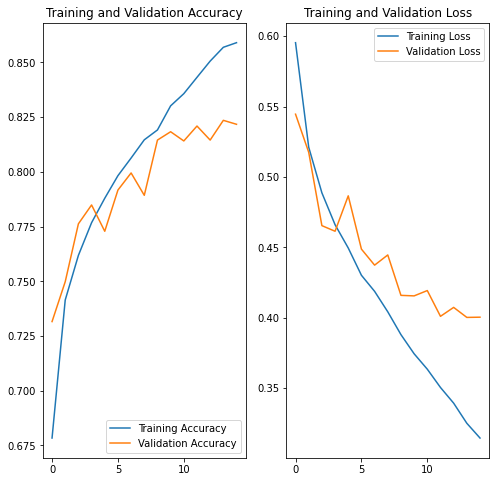

In [22]:
#visualising training results
acc_train = history.history['accuracy']
acc_test = history.history['val_accuracy']

loss_train=history.history['loss']
loss_test=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_train, label='Training Accuracy')
plt.plot(epochs_range, acc_test, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_train, label='Training Loss')
plt.plot(epochs_range, loss_test, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

Step 6: Create an inference function/script to load and perform prediction on the trained model.

In [33]:
img_width = 50
img_height =50
import numpy as np
from google.colab import files
from keras.preprocessing import image

def predict_from_model(model, image_size):
  uploaded = files.upload()

  for fn in uploaded.keys():
  
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=image_size)
    x = image.img_to_array(img)
    x = x*(1/255.0) #since the train and validation data was also rescaled
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    print(classes[0])
    if classes[0]>0.5:
      print(fn + " is a dog")
    else:
      print(fn + " is a cat")

predict_from_model(model, (img_width,img_height))

Saving 3.jpg to 3 (1).jpg
[0.30017665]
3.jpg is a cat


Predictions:
(1st prediction)
  
4.jpg(image/jpeg) - 108590 bytes, last modified: 2/10/2017 - 100% done
Saving 4.jpg to 4.jpg
[0.9957242]
4.jpg is a dog
This was a correct prediction
(2nd prediction)
  11.jpg(image/jpeg) - 32280 bytes, last modified: 2/10/2017 - 100% done
Saving 11.jpg to 11.jpg
[0.33406177]
11.jpg is a cat
This was also a correct prediction

(3rd prediction)
    3.jpg(image/jpeg) - 30730 bytes, last modified: 2/10/2017 - 100% done
Saving 3.jpg to 3 (1).jpg
[0.30017665]
3.jpg is a cat
This was a wrong prediction - supposed to be a dog..

**Step 7: Explainable AI – Create heatmap aka GRAD-CAM to visualize what your AI/ML model
is seeing to arrive at the decision. Use the TF-EXPLAIN library to do the same.**

In [34]:
def get_gradcam_using_tfexplain(image_path, image_size, save_path, save_name, model, layer_name):
  from PIL import Image
  import matplotlib.pyplot as plt
  from tf_explain.core.grad_cam import GradCAM
  import cv2
  IMAGE_PATH = image_path
  img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size = image_size)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = img*(1/255.0)
  data = ([img], None)
  class_index = 0

  explainer = GradCAM()
  grid = explainer.explain(data, model, 0, layer_name, colormap=cv2.COLORMAP_VIRIDIS)
  explainer.save(grid, save_path, save_name)

  img = Image.open(save_path+save_name)
  plt.imshow(img)
  plt.figure()

In [35]:
pip install tf-explain

     |████████████████████████████████| 51kB 2.0MB/s 


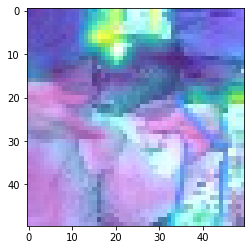

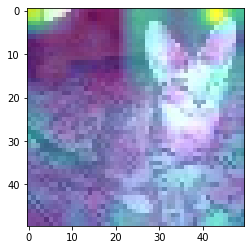

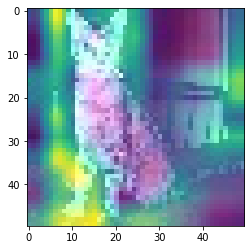

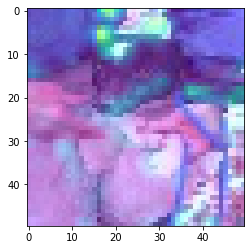

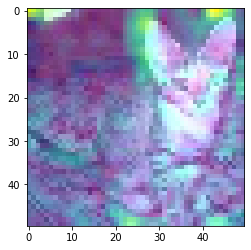

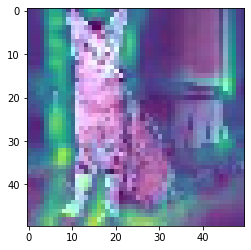

<Figure size 432x288 with 0 Axes>

In [37]:
import tensorflow as tf
import cv2
image_path1 = '/content/1.jpg'
image_path2 = '/content/7.jpg'
image_path3 = '/content/random_dataset/test/cats/10000.jpg'
target_size = (img_width,img_height)
layer_name = "conv2d_1"
pool_name = "max_pooling2d_1"

#using the last pooling layer for gradcam visualization
get_gradcam_using_tfexplain(image_path1, target_size, "/content/",'gc_pooling_1.jpg', model, pool_name)
get_gradcam_using_tfexplain(image_path2, target_size,"/content/" ,'gc_pooling_2.jpg', model, pool_name)
get_gradcam_using_tfexplain(image_path3, target_size, "/content/",'gc_pooling_3.jpg', model, pool_name)

#using the last convolution layer for visalization
get_gradcam_using_tfexplain(image_path1, target_size, "/content/",'gc_convo_1.jpg', model, layer_name)
get_gradcam_using_tfexplain(image_path2, target_size, "/content/",'gc_convo_2.jpg', model, layer_name)
get_gradcam_using_tfexplain(image_path3, target_size, "/content/",'gc_convo_3.jpg', model, layer_name)


The grad cam used is working on the last convolution layer and the last pooling layer created by the cnn model and  the heat maps generated are not so effective , this can be improved by using a built in network --- Task2-cat-and-dog